In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [221]:
# Number of iterations and years
itr = 50000
yrs = 50

# Distribution parameters
ann_ret = 0.07
ann_vol = 0.10

ann_dist = 0.06 
dist_std_dev = 0.002

ann_contr = 500000000
contr_std_dev = 100000000

# Populate returns, distributions, contributions amounts
returns = np.random.normal(loc=ann_ret, scale=ann_vol, size=(itr, yrs))
dist = np.random.normal(loc=ann_dist, scale=dist_std_dev, size=(itr, yrs))
contr = np.random.normal(loc=ann_contr, scale=contr_std_dev, size=(itr, yrs))

### Model 1

In [222]:
# Initialize balance matrix with $6.5E9 as initial amount
bal = np.zeros((itr, yrs))
bal[:, 0] = 6500000000

# Initialize distribution tab matrix
dist_tab = np.zeros((itr, yrs))

# Simulate 20 years
for y in range(1, yrs):
    # Previous balance
    prev_bal = bal[:, y-1]
    
    # Calculate new balance
    bal[:, y] = prev_bal + (prev_bal * returns[:, y]) - dist[:, y] * (prev_bal + prev_bal * abs(returns[:, y])) + contr[:, y]
    
    # Calculate distributions
    dist_tab[:, y] = prev_bal * dist[:, y]

# Convert balance and dist_tab to DataFrames if needed for further processing
bal_df = pd.DataFrame(bal)
dist_tab_df = pd.DataFrame(dist_tab)

# Record sum of all distributions given
dist_tab_df['Sum'] = dist_tab_df.sum(axis=1)

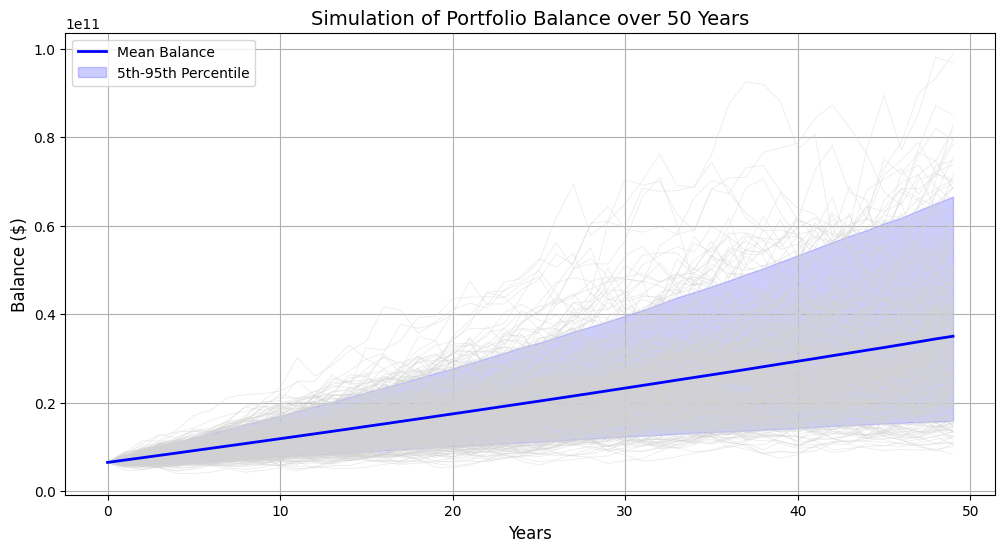

In [223]:
# Plotting
plt.figure(figsize=(12, 6))  # Increased figure size for better readability

# Plot a sample of the simulations
sample_size = 500  # Number of simulations to plot
sample_indices = np.random.choice(itr, sample_size, replace=False)
for i in sample_indices:
    plt.plot(bal_df.columns, bal_df.iloc[i], color='lightgray', alpha=0.5, linewidth=0.5)

# Plot mean and percentiles
mean_balance = bal_df.mean(axis=0)
percentile_5th = bal_df.quantile(0.05, axis=0)
percentile_95th = bal_df.quantile(0.95, axis=0)

plt.plot(bal_df.columns, mean_balance, color='blue', linewidth=2, label='Mean Balance')
plt.fill_between(bal_df.columns, percentile_5th, percentile_95th, color='blue', alpha=0.2, label='5th-95th Percentile')

# Adding labels, title, and grid
plt.xlabel('Years', fontsize=12)
plt.ylabel('Balance ($)', fontsize=12)
plt.title('Simulation of Portfolio Balance over 50 Years', fontsize=14)
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

Percentiles [25, 50, 90] for End Balances: [23.41245874 31.32819253 55.83467613] billion dollars


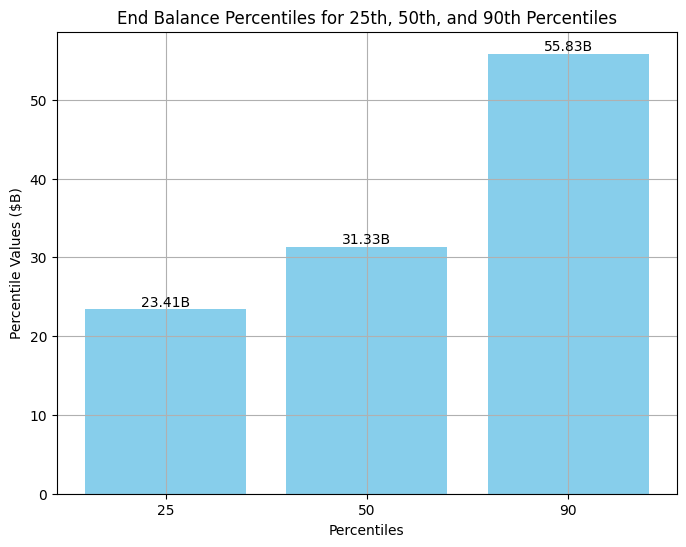

In [224]:
# Calculate and print percentiles for end balances
percentiles = [25, 50, 90]
percentile_values_end_balance = np.percentile(bal_df.iloc[:, -1], percentiles)

# Convert values to billions of dollars
percentile_values_end_balance_billion = percentile_values_end_balance / 1e9

print(f"Percentiles {percentiles} for End Balances: {percentile_values_end_balance_billion} billion dollars")

# Plotting the percentiles as a bar chart for end balances
plt.figure(figsize=(8, 6))
bars = plt.bar([str(p) for p in percentiles], percentile_values_end_balance_billion, color='skyblue')

# Annotate each bar with the value in billions
for bar, value in zip(bars, percentile_values_end_balance_billion):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{value:.2f}B', ha='center', va='bottom')

plt.xlabel('Percentiles')
plt.ylabel('Percentile Values ($B)')
plt.title('End Balance Percentiles for 25th, 50th, and 90th Percentiles')
plt.grid(True)
plt.show()

Percentiles [25, 50, 90] for Total Distributions: [46.43847661 55.67419972 81.24653312] billions of dollars


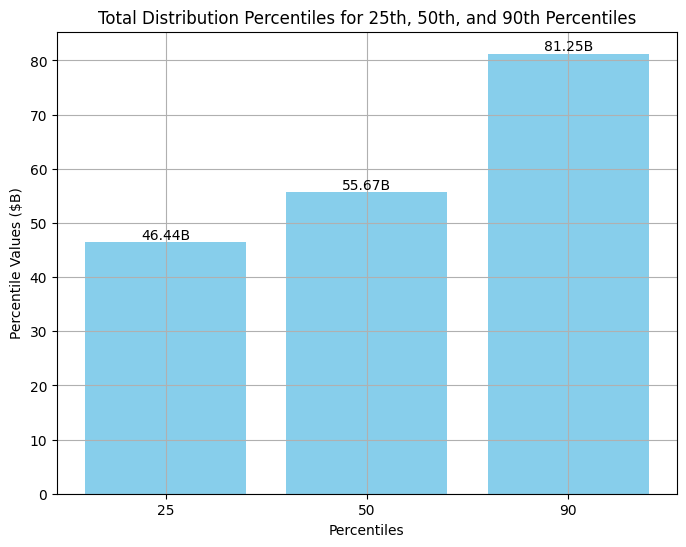

In [225]:
# Calculate and print percentiles for total distributions
percentiles = [25, 50, 90]
percentile_values_distributions = np.percentile(dist_tab_df['Sum'], percentiles)

# Convert values to billions of dollars
percentile_values_distributions_billion = percentile_values_distributions / 1e9

print(f"Percentiles {percentiles} for Total Distributions: {percentile_values_distributions_billion} billions of dollars")

# Plotting the percentiles as a bar chart for total distributions
plt.figure(figsize=(8, 6))
bars = plt.bar([str(p) for p in percentiles], percentile_values_distributions_billion, color='skyblue')

# Annotate each bar with the value in billions
for bar, value in zip(bars, percentile_values_distributions_billion):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{value:.2f}B', ha='center', va='bottom')

plt.xlabel('Percentiles')
plt.ylabel('Percentile Values ($B)')
plt.title('Total Distribution Percentiles for 25th, 50th, and 90th Percentiles')
plt.grid(True)
plt.show()

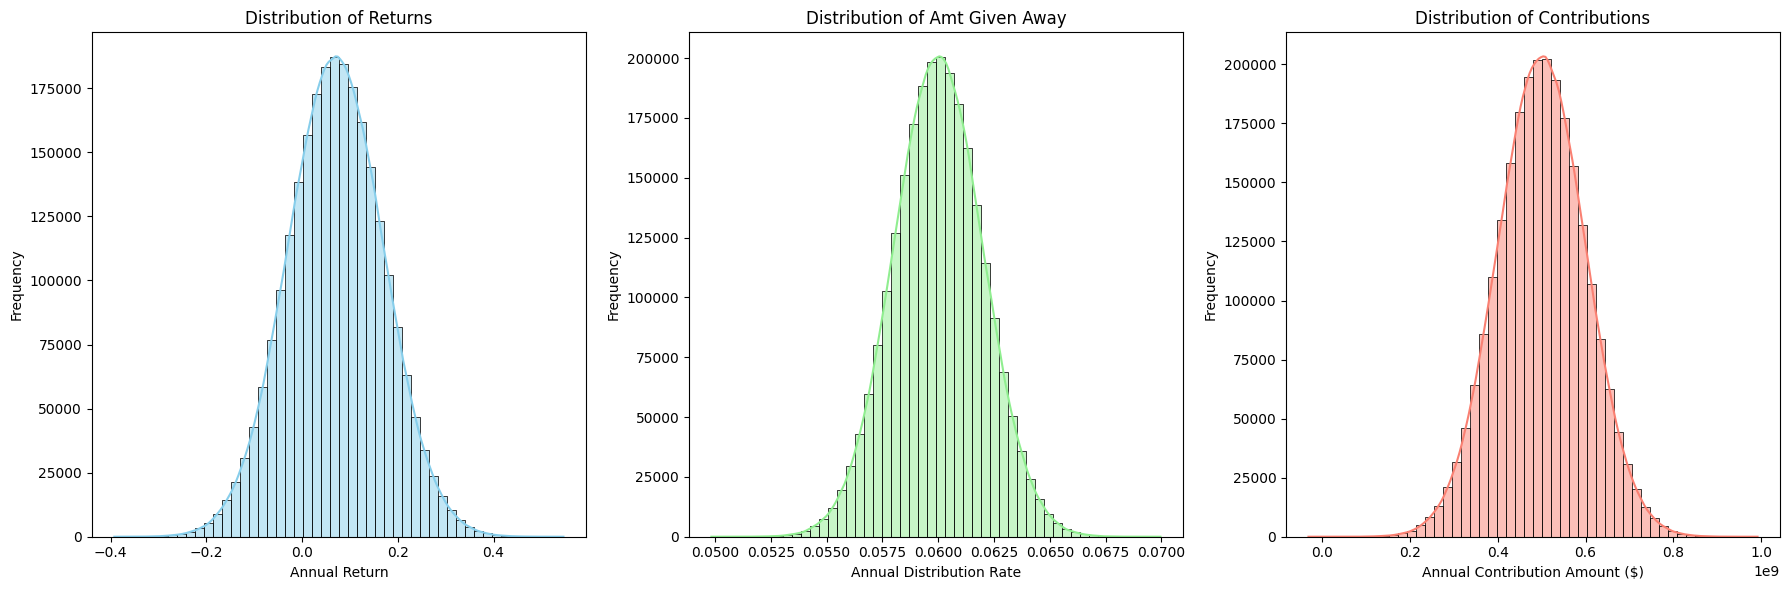

In [226]:
# Plotting histograms with KDE for each parameter
plt.figure(figsize=(18, 6))

# Plot for Returns
plt.subplot(1, 3, 1)
sns.histplot(returns.flatten(), bins=50, kde=True, color='skyblue')
plt.title('Distribution of Returns')
plt.xlabel('Annual Return')
plt.ylabel('Frequency')

# Plot for Distributions
plt.subplot(1, 3, 2)
sns.histplot(dist.flatten(), bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Amt Given Away')
plt.xlabel('Annual Distribution Rate')
plt.ylabel('Frequency')

# Plot for Contributions
plt.subplot(1, 3, 3)
sns.histplot(contr.flatten(), bins=50, kde=True, color='salmon')
plt.title('Distribution of Contributions')
plt.xlabel('Annual Contribution Amount ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Model 2

In [227]:
# Number of iterations and years
itr = 50000
yrs = 50

# Distribution parameters
ann_ret = 0.07
ann_vol = 0.1

ann_dist = 0.06 
dist_std_dev = 0

ann_contr = 500000000
contr_std_dev = 100000000

# Populate returns, distributions, contributions amounts
returns = np.random.normal(loc=ann_ret, scale=ann_vol, size=(itr, yrs))
dist = np.random.normal(loc=ann_dist, scale=dist_std_dev, size=(itr, yrs))
contr = np.random.normal(loc=ann_contr, scale=contr_std_dev, size=(itr, yrs))

In [228]:
# Initialize balance matrix with $6.5E9 as initial amount
bal = np.zeros((itr, yrs))
bal[:, 0] = 6500000000

# Initialize distribution tab matrix
dist_tab = np.zeros((itr, yrs))

# Simulate 50 years
for y in range(1, yrs):
    prev_bal = bal[:, y-1]
    
    if y <= 40:
        # First 25 years
        bal[:, y] = prev_bal + (prev_bal * returns[:, y]) - dist[:, y] * (prev_bal + prev_bal * abs(returns[:, y])) + contr[:, y]
    else:
        # Last 25 years
        bal[:, y] = prev_bal + (prev_bal * returns[:, y]) - dist[:, y] * ((prev_bal + prev_bal * abs(returns[:, y]))*y/10) + contr[:, y] # Closer to 0 faster decay
    
    # Calculate distributions
    dist_tab[:, y] = prev_bal * dist[:, y]

# Convert balance and dist_tab to DataFrames if needed for further processing
bal_df = pd.DataFrame(bal)
dist_tab_df = pd.DataFrame(dist_tab)

# Record sum of all distributions given
dist_tab_df['Sum'] = dist_tab_df.sum(axis=1)

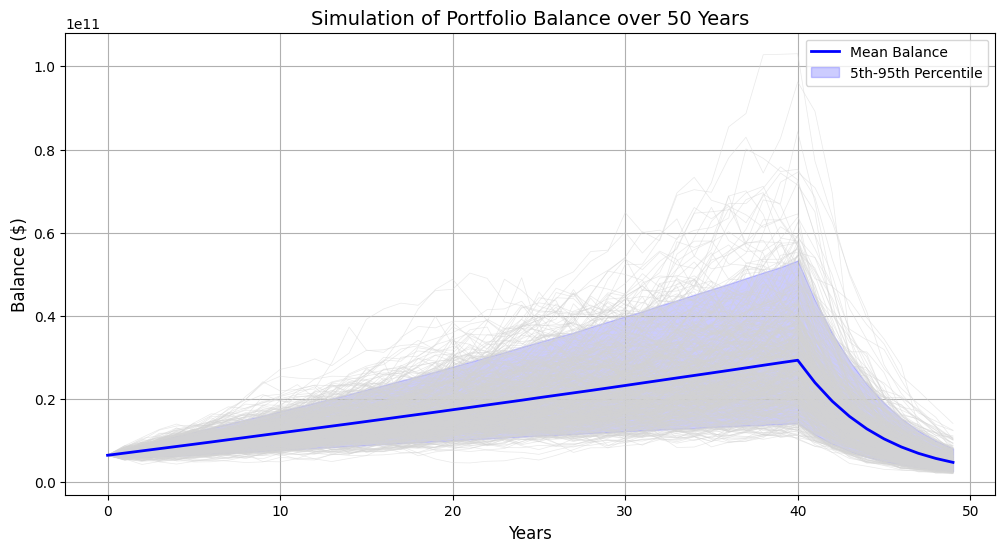

In [229]:
# Plotting
plt.figure(figsize=(12, 6))  # Increased figure size for better readability

# Plot a sample of the simulations
sample_size = 500  # Number of simulations to plot
sample_indices = np.random.choice(itr, sample_size, replace=False)
for i in sample_indices:
    plt.plot(bal_df.columns, bal_df.iloc[i], color='lightgray', alpha=0.5, linewidth=0.5)

# Plot mean and percentiles
mean_balance = bal_df.mean(axis=0)
percentile_5th = bal_df.quantile(0.05, axis=0)
percentile_95th = bal_df.quantile(0.95, axis=0)

plt.plot(bal_df.columns, mean_balance, color='blue', linewidth=2, label='Mean Balance')
plt.fill_between(bal_df.columns, percentile_5th, percentile_95th, color='blue', alpha=0.2, label='5th-95th Percentile')

# Adding labels, title, and grid
plt.xlabel('Years', fontsize=12)
plt.ylabel('Balance ($)', fontsize=12)
plt.title('Simulation of Portfolio Balance over 50 Years', fontsize=14)
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

Percentiles [25, 50, 90] for End Balances: [3.56518639 4.42750312 7.0390144 ] billion dollars


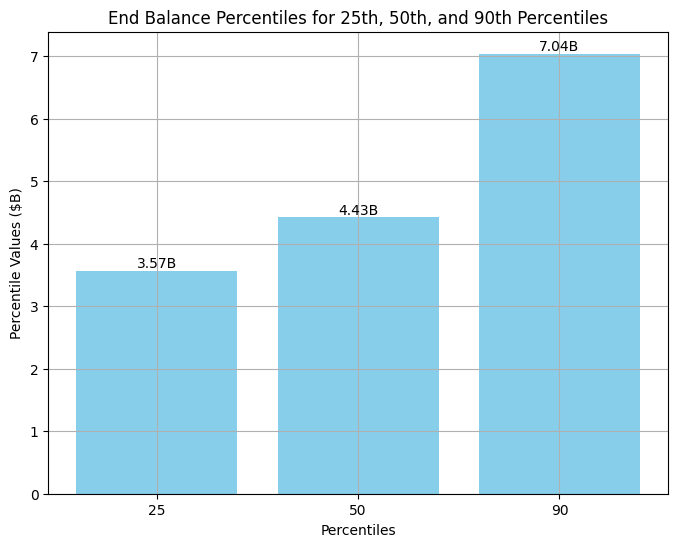

In [230]:
# Calculate and print percentiles for end balances
percentiles = [25, 50, 90]
percentile_values_end_balance = np.percentile(bal_df.iloc[:, -1], percentiles)

# Convert values to billions of dollars
percentile_values_end_balance_billion = percentile_values_end_balance / 1e9

print(f"Percentiles {percentiles} for End Balances: {percentile_values_end_balance_billion} billion dollars")

# Plotting the percentiles as a bar chart for end balances
plt.figure(figsize=(8, 6))
bars = plt.bar([str(p) for p in percentiles], percentile_values_end_balance_billion, color='skyblue')

# Annotate each bar with the value in billions
for bar, value in zip(bars, percentile_values_end_balance_billion):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{value:.2f}B', ha='center', va='bottom')

plt.xlabel('Percentiles')
plt.ylabel('Percentile Values ($B)')
plt.title('End Balance Percentiles for 25th, 50th, and 90th Percentiles')
plt.grid(True)
plt.show()

Percentiles [25, 50, 90] for Total Distributions: [39.67965292 47.07470652 67.79667415] billions of dollars


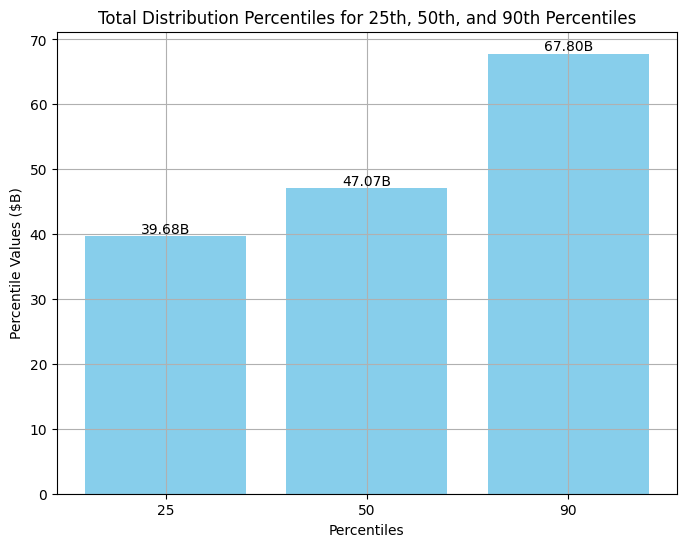

In [231]:
# Calculate and print percentiles for total distributions
percentiles = [25, 50, 90]
percentile_values_distributions = np.percentile(dist_tab_df['Sum'], percentiles)

# Convert values to billions of dollars
percentile_values_distributions_billion = percentile_values_distributions / 1e9

print(f"Percentiles {percentiles} for Total Distributions: {percentile_values_distributions_billion} billions of dollars")

# Plotting the percentiles as a bar chart for total distributions
plt.figure(figsize=(8, 6))
bars = plt.bar([str(p) for p in percentiles], percentile_values_distributions_billion, color='skyblue')

# Annotate each bar with the value in billions
for bar, value in zip(bars, percentile_values_distributions_billion):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{value:.2f}B', ha='center', va='bottom')

plt.xlabel('Percentiles')
plt.ylabel('Percentile Values ($B)')
plt.title('Total Distribution Percentiles for 25th, 50th, and 90th Percentiles')
plt.grid(True)
plt.show()

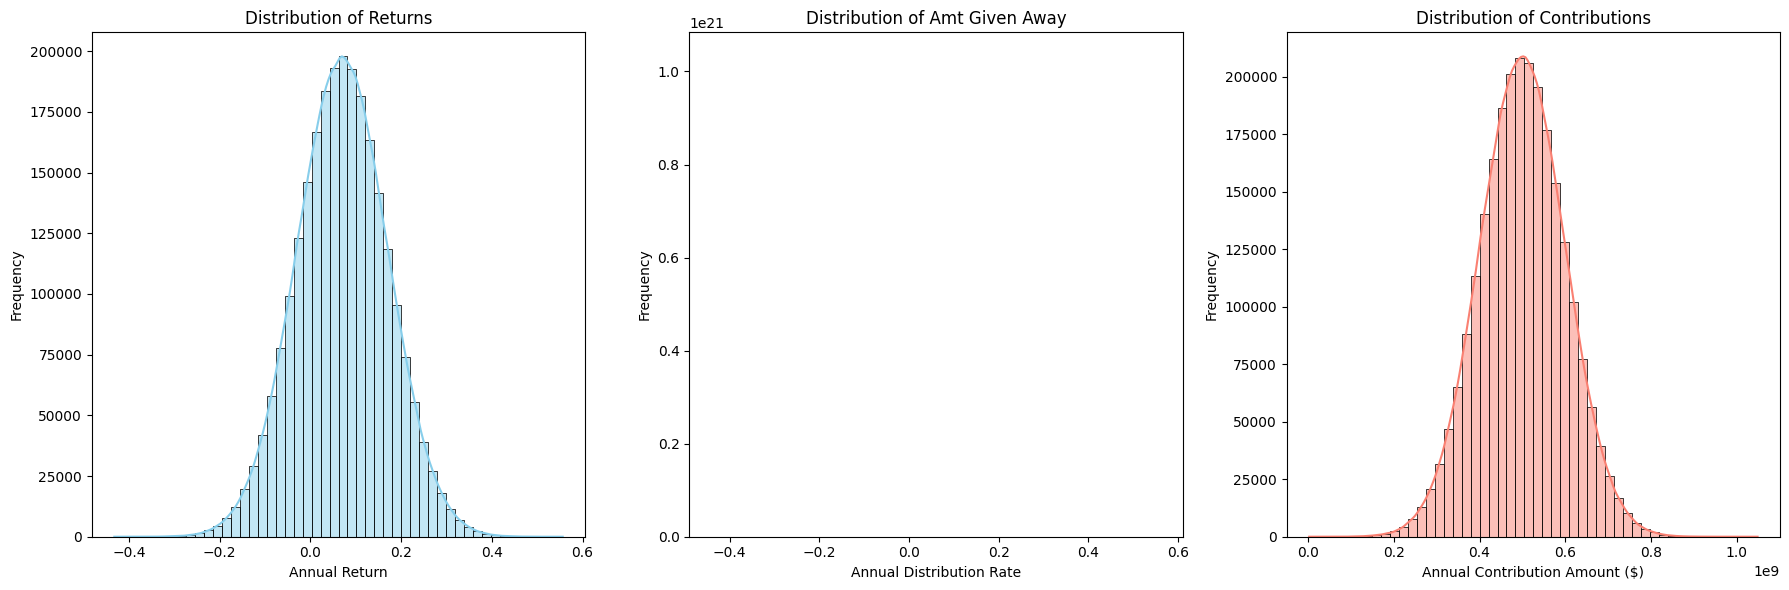

In [232]:
# Plotting histograms with KDE for each parameter
plt.figure(figsize=(18, 6))

# Plot for Returns
plt.subplot(1, 3, 1)
sns.histplot(returns.flatten(), bins=50, kde=True, color='skyblue')
plt.title('Distribution of Returns')
plt.xlabel('Annual Return')
plt.ylabel('Frequency')

# Plot for Distributions
plt.subplot(1, 3, 2)
sns.histplot(dist.flatten(), bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Amt Given Away')
plt.xlabel('Annual Distribution Rate')
plt.ylabel('Frequency')

# Plot for Contributions
plt.subplot(1, 3, 3)
sns.histplot(contr.flatten(), bins=50, kde=True, color='salmon')
plt.title('Distribution of Contributions')
plt.xlabel('Annual Contribution Amount ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [233]:
pwd

'C:\\Users\\skosloff'